PRECISION @ 10


In [1]:
import os
import pandas as pd
import math

# COMBINATION
comb = 'Co3'

# folder path
dir_path  = '/media/cecilia/DISCO2/mogp_with_terms_results/'+comb+ "/"
save_path = '/home/cecilia/repos/mogp_with_terms/moeir_comparison/'

topicos = os.listdir(dir_path)

#test
#topicos = [topicos[0], topicos[1]]
print(topicos)

['1', '134', '187', '215', '221', '25', '259', '289', '350', '363', '37', '403', '418', '428', '465', '476', '528', '529', '537', '538', '556', '561', '58', '586', '99']


In [2]:
df_ave_data = pd.DataFrame(columns=['topic', '1','2','3', '4', '5'])

for t in topicos:    
    files = os.listdir( "".join( [dir_path,"/", t]))
        
    # inserto nro de topico
    row = [t]

    for f in sorted(files):
        if "_EVALUATION_GEN_1__precision.txt" in f:
                        
            run = f.split('_')[1] # nro de run
            path_pr = "".join([dir_path,"/", t,"/", f])
            
            # read text file into pandas DataFrame
            df_metric = pd.read_csv(path_pr, header=None, sep='\s+')
                                            
            mean = df_metric.mean(numeric_only=True, axis=0)

            # mean es un df, asi que acceder a columna 0
            row.append(mean[0])            
    
    
    # df con promedio de la ultima poblacion de p@10 de cada corrida para cada topico
    #    topic     1      2       3           4      5        
    #    134	0.7050	0.719	0.760000	0.816	0.808
    #     1	    0.8055	0.817	0.799333	0.690	0.830
    df_ave_data = pd.concat([pd.DataFrame([row], columns=df_ave_data.columns), df_ave_data], ignore_index=True)


# set the 'topic' column as index
df_ave_data.set_index('topic', inplace=True)
df_ave_data = df_ave_data.sort_values(by='topic', ascending=True)

df_ave_data = df_ave_data.transpose()
df_ave_data.to_csv(save_path + 'co3_precision10_evaluation_by_run_gen_1.csv')

df_ave_data

topic,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
1,0.463587,0.178,0.092000,0.0080,0.100833,0.034,0.009,0.118,0.069056,0.087,...,0.028,0.042000,0.312000,0.094,0.111500,0.017,0.047,0.107000,0.044,0.011
2,0.405532,0.156,0.074000,0.0100,0.091107,0.024,0.014,0.071,0.080429,0.079,...,0.021,0.037000,0.275444,0.082,0.138417,0.018,0.026,0.126179,0.057,0.010
3,0.336405,0.196,0.097444,0.0180,0.165000,0.037,0.013,0.100,0.085000,0.090,...,0.034,0.077000,0.287000,0.089,0.100444,0.013,0.042,0.085000,0.044,0.019
4,0.364905,0.145,0.081500,0.0165,0.136857,0.066,0.014,0.108,0.113667,0.077,...,0.020,0.065000,0.264429,0.073,0.117000,0.018,0.030,0.114000,0.052,0.011
5,0.447952,0.177,0.094667,0.0110,0.137667,0.078,0.018,0.110,0.116667,0.074,...,0.035,0.057667,0.275667,0.094,0.115333,0.019,0.029,0.123000,0.064,0.010


In [3]:

stats_by_topic = df_ave_data.agg(['mean', 'count', 'std'])
stats_by_topic

,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
mean,0.403676,0.170400,0.087922,0.012700,0.126293,0.047800,0.013600,0.10140,0.092963,0.081400,...,0.027600,0.055733,0.282908,0.086400,0.116539,0.017000,0.034800,0.111036,0.052200,0.012200
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
std,0.053809,0.020057,0.009847,0.004324,0.030106,0.023004,0.003209,0.01816,0.021110,0.006804,...,0.007021,0.016442,0.018116,0.008961,0.013827,0.002345,0.009149,0.016397,0.008614,0.003834


In [4]:
stats_all_topics =stats_by_topic.transpose()
stats_all_topics

,mean,count,std
1,0.403676,5.0,0.053809
134,0.170400,5.0,0.020057
187,0.087922,5.0,0.009847
215,0.012700,5.0,0.004324
221,0.126293,5.0,0.030106
25,0.047800,5.0,0.023004
259,0.013600,5.0,0.003209
289,0.101400,5.0,0.018160
350,0.092963,5.0,0.021110
363,0.081400,5.0,0.006804


se promedian solo los promedios de los tópicos y se calcula el STD sobre esos promedios

In [5]:
stats_all_topics['mean'].describe().transpose()


t = pd.DataFrame({  'mean_prec': [stats_all_topics['mean'].mean()],                    
                    'count_prec': [stats_all_topics['mean'].count()],
                    'std_prec': [stats_all_topics['mean'].std()]})

ci95_hi = []
ci95_lo = []

m, c, s = t.loc[0]

ci95_hi.append(m + 1.96*s/math.sqrt(c))
ci95_lo.append(m - 1.96*s/math.sqrt(c))

t['ci95_lo_prec'] = ci95_lo
t['ci95_hi_prec'] = ci95_hi


t.to_csv(save_path + 'co3_precision10_evaluation_stats_gen_1.csv')
t

,mean_prec,count_prec,std_prec,ci95_lo_prec,ci95_hi_prec
0,0.096849,25,0.099733,0.057753,0.135944


Text(0.5, 0.98, 'Precision@10  - Co3')

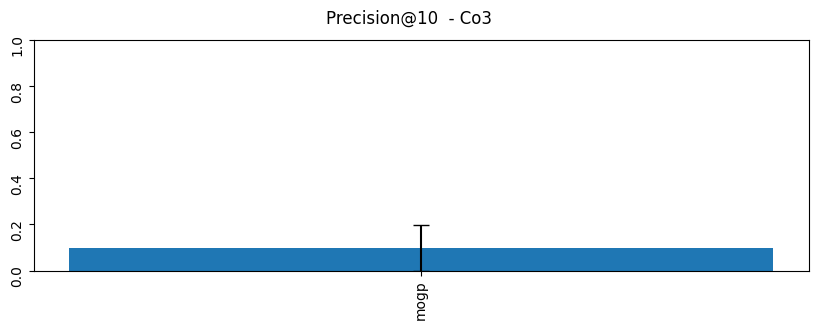

In [6]:
######### PRECISION @ 10
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1,1, figsize=(10, 3), sharey=False)
axs.tick_params(labelrotation=90)
axs.bar('mogp', t['mean_prec'], yerr=t['std_prec'], capsize=6)
axs.set_ylim(0,1)
fig.suptitle('Precision@10  - '+ comb)